<a href="https://colab.research.google.com/github/horsinnaround/Works/blob/main/work_37%20corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install datasets
# from datasets import load_dataset

# dataset = load_dataset("amazon_reviews_multi", "all_languages")

# collecting data

In [ ]:
# !pip install -q kaggle==1.5.15
# from google.colab import files
# files.upload()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"willyvonka","key":"35867c8c758a23f06c18a2a0b9078ed8"}'}

In [ ]:
# !mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# !kaggle datasets download -d datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 70.7MB/s]


In [ ]:
# !unzip /content/covid-19-nlp-text-classification.zip

Archive:  /content/covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [3]:
import pandas as pd

In [4]:
# data1 = pd.read_csv('/content/Corona_NLP_train.csv', encoding="latin-1")
# data2 = pd.read_csv('/content/Corona_NLP_test.csv', encoding="latin-1")

# data = pd.concat([data1,data2])

In [5]:
# data = data[['OriginalTweet','Sentiment']]

In [6]:
# data.to_csv('/content/drive/MyDrive/work 37 corona /data.csv',index=False)

In [7]:
data = pd.read_csv('/content/drive/MyDrive/work 37 corona /data.csv')

In [8]:
path = '/content/drive/MyDrive/work 37 corona /'

In [9]:
data.columns = ['tweet','sentiment']

In [10]:
# data.drop('tweet',axis=1,inplace=True)

In [11]:
data.drop_duplicates(subset=['tweet'],inplace=True)

In [12]:
data.dropna(subset=['tweet'],inplace=True)

In [13]:
data.shape

(44956, 2)

In [14]:
data['sentiment'].value_counts()

Positive              12369
Negative              10958
Neutral                8330
Extremely Positive     7223
Extremely Negative     6073
Name: sentiment, dtype: int64

In [15]:
# !mkdir /content/drive/MyDrive/emotion-detection/
# data.to_csv('/content/drive/MyDrive/emotion-detection/data.csv',index=False)

In [16]:
# import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/emotion-detection/data.csv')

In [17]:
# import os
# path = '/content/drive/MyDrive/emotion-detection/resluts/'
# os.mkdir(path)

# Work on data

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# plt.rcParams['figure.figsize'] = [10,6]
# plt.rcParams['figure.dpi'] = 140
# plt.rcParams['savefig.dpi'] = 140
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [21]:
data.columns

Index(['tweet', 'sentiment'], dtype='object')

In [22]:
b = dict(data['sentiment'].value_counts())

In [23]:
f = pd.DataFrame.from_dict(b, orient='index')

In [24]:
f

,0
Positive,12369
Negative,10958
Neutral,8330
Extremely Positive,7223
Extremely Negative,6073


In [25]:
f['precentage'] = f[0]/f[0].sum()

In [26]:
f.drop(0,axis=1,inplace=True)

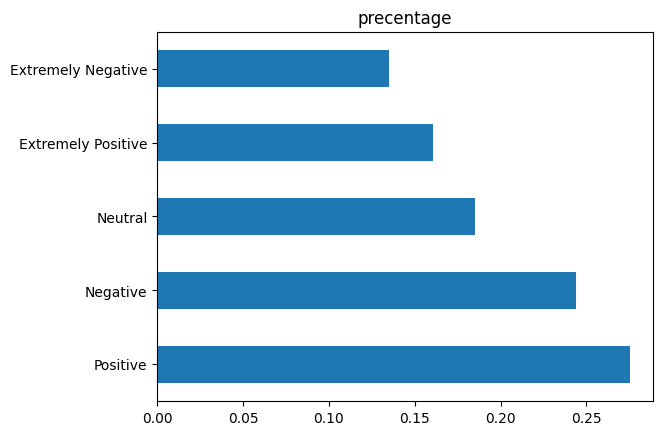

In [28]:
f.plot(kind='barh',subplots=True,legend=False)
plt.savefig(f'{path}labels_pie.png',bbox_inches='tight')
f.to_csv(f'{path}labels_pie.csv')

# Pre Processing

In [ ]:
# import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/emotion-detection/data.csv')

In [29]:
import re

In [30]:
def low(x):
    x = x.lower()
    return x

In [31]:
def removepunc(x):
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[0-9A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    return x

In [32]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
  return x

In [33]:
lab = 'tweet'

In [34]:
data[f'{lab}'] = data[f'{lab}'].apply(lambda x:low(x))

In [35]:
data[f'{lab}'] = data[f'{lab}'].apply(lambda x:removepunc(x))

In [36]:
# data['utt'] = data['utt'].apply(lambda x:removedate(x))

In [37]:
data[f'{lab}'] = data[f'{lab}'].apply(lambda x:lenword(x))

In [38]:
# data['text'] = data['text'].apply(lambda x:stopw(x))


In [39]:
data['len'] = data[f'{lab}'].str.split().apply(len)

In [40]:
data.len.max()

62

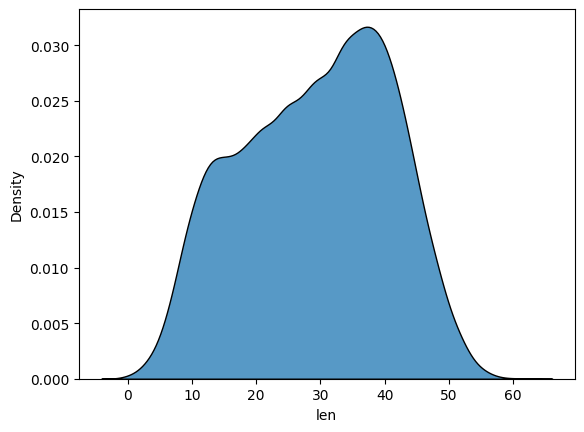

In [41]:
# sns.histplot(data['len'],kind='kde')
sns.kdeplot(data=data['len'],multiple="stack")
data['len'].to_csv(f'{path}wordlen.csv',index=False)
plt.savefig(f'{path}wordlen.png',bbox_inches='tight')

In [42]:
# import tensorflow as tf
# import numpy as np
# # Load GloVe embeddings
# embeddings_index = {}
# with open('/content/drive/MyDrive/glove.6B.300d.txt', encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

In [43]:
# # import required libraries
# import numpy as np
# from numpy.linalg import norm

# A = embeddings_index['difficult']
# B = embeddings_index["problem"]
# # compute cosine similarity
# cosine = np.dot(A,B)/(norm(A)*norm(B))
# print("Cosine Similarity:", cosine)

In [44]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 60
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data[f'{lab}'])
Xsequences = tokenizer.texts_to_sequences(data[f'{lab}'])

In [ ]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [ ]:
len(tokenizer.word_index)

54589

# Model

In [ ]:
data.columns

Index(['tweet', 'sentiment', 'len'], dtype='object')

In [ ]:
Y = data['sentiment'].factorize()[0]
labels = Y
arr = labels
arr.shape
labels = np.zeros((arr.size, arr.max()+1))
labels.shape
labels[np.arange(arr.size), arr] = 1
labels

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xsequences,labels,test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = Xsequences[train.index],Xsequences[test.index],labels[train.index],labels[test.index]
# X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5, random_state=42)

In [ ]:
y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
embedding_dim = 50

In [ ]:
# max_words = max_words-1

In [ ]:
import tensorflow as tf


In [ ]:
Xsequences.dtype

dtype('int32')

In [ ]:
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
y_test.shape

(8992, 5)

In [ ]:
# y_test.reshape(-1,).shape[0]/5

8992.0

In [ ]:
from sklearn.metrics import classification_report

def savemod(model,pa,path=path,y_test=y_test,X_test=X_test):
    ff = pd.DataFrame(columns=['real','predicted'])
    y2 = y_test
    y1 = model.predict(X_test)
    ff['real'] = y2.reshape(-1,)
    ff['predicted'] = y1.reshape(-1,)
    # print(classification_report(y1,y2))
    ff.to_csv(f'{path}{pa}.csv',index=False)

In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 50)            250000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 325       
                                                                 
Total params: 275,733
Trainable params: 275,733
Non-trainable params: 0
________________________________________________

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                # es
                                ],)

Epoch 1/10
1124/1124 [==============================] - 77s 63ms/step - loss: 1.1258 - accuracy: 0.5311 - val_loss: 0.8227 - val_accuracy: 0.6962 - lr: 0.0010
Epoch 2/10
1124/1124 [==============================] - 14s 12ms/step - loss: 0.7266 - accuracy: 0.7479 - val_loss: 0.7443 - val_accuracy: 0.7395 - lr: 0.0010
Epoch 3/10
1124/1124 [==============================] - 12s 11ms/step - loss: 0.6318 - accuracy: 0.7877 - val_loss: 0.7086 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 4/10
1124/1124 [==============================] - 12s 11ms/step - loss: 0.5669 - accuracy: 0.8106 - val_loss: 0.7625 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 5/10
1124/1124 [==============================] - 13s 11ms/step - loss: 0.5066 - accuracy: 0.8328 - val_loss: 0.7472 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 6/10
1120/1124 [============================>.] - ETA: 0s - loss: 0.4539 - accuracy: 0.8508
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1124/1124 [====================

In [ ]:
savemod(model=model,pa='LSTM',y_test=y_test,X_test=X_test)

281/281 [==============================] - 2s 3ms/step


In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 60, 50)            250000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 60, 64)           21248     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                # es
                                ],)

Epoch 1/10
1124/1124 [==============================] - 51s 38ms/step - loss: 1.1513 - accuracy: 0.5225 - val_loss: 0.8139 - val_accuracy: 0.7046 - lr: 0.0010
Epoch 2/10
1124/1124 [==============================] - 20s 18ms/step - loss: 0.7324 - accuracy: 0.7493 - val_loss: 0.7421 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 3/10
1124/1124 [==============================] - 20s 18ms/step - loss: 0.6341 - accuracy: 0.7898 - val_loss: 0.6921 - val_accuracy: 0.7597 - lr: 0.0010
Epoch 4/10
1124/1124 [==============================] - 18s 16ms/step - loss: 0.5702 - accuracy: 0.8125 - val_loss: 0.7161 - val_accuracy: 0.7575 - lr: 0.0010
Epoch 5/10
1124/1124 [==============================] - 18s 16ms/step - loss: 0.5131 - accuracy: 0.8316 - val_loss: 0.7437 - val_accuracy: 0.7461 - lr: 0.0010
Epoch 6/10
1122/1124 [============================>.] - ETA: 0s - loss: 0.4641 - accuracy: 0.8498
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1124/1124 [====================

In [ ]:
savemod(model=model,pa='2-LSTM',y_test=y_test,X_test=X_test)

281/281 [==============================] - 3s 6ms/step


In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 60, 50)            250000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 60, 64)           21248     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 60, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                      

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                # es
                                ],)

Epoch 1/10
1124/1124 [==============================] - 58s 42ms/step - loss: 1.2219 - accuracy: 0.4775 - val_loss: 0.8515 - val_accuracy: 0.6775 - lr: 0.0010
Epoch 2/10
1124/1124 [==============================] - 27s 24ms/step - loss: 0.7423 - accuracy: 0.7412 - val_loss: 0.7198 - val_accuracy: 0.7548 - lr: 0.0010
Epoch 3/10
1124/1124 [==============================] - 26s 23ms/step - loss: 0.6337 - accuracy: 0.7845 - val_loss: 0.6921 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 4/10
1124/1124 [==============================] - 25s 22ms/step - loss: 0.5618 - accuracy: 0.8107 - val_loss: 0.6982 - val_accuracy: 0.7566 - lr: 0.0010
Epoch 5/10
1124/1124 [==============================] - 26s 23ms/step - loss: 0.5030 - accuracy: 0.8334 - val_loss: 0.7195 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 6/10
1124/1124 [==============================] - 25s 22ms/step - loss: 0.4436 - accuracy: 0.8564 - val_loss: 0.8092 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 7/10
1124/1124 [========================

In [ ]:
savemod(model=model,pa='3-LSTM',y_test=y_test,X_test=X_test)

281/281 [==============================] - 4s 7ms/step


In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    tf.keras.layers.Conv1D(32, 2, activation='relu',),
    tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 60, 50)            250000    
                                                                 
 conv1d_4 (Conv1D)           (None, 59, 32)            3232      
                                                                 
 conv1d_5 (Conv1D)           (None, 58, 64)            4160      
                                                                 
 bidirectional_9 (Bidirectio  (None, 58, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 64)               

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=5,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                # es
                                ],)

Epoch 1/5
1124/1124 [==============================] - 50s 38ms/step - loss: 1.1820 - accuracy: 0.5072 - val_loss: 0.8653 - val_accuracy: 0.6798 - lr: 0.0010
Epoch 2/5
1124/1124 [==============================] - 20s 18ms/step - loss: 0.7404 - accuracy: 0.7441 - val_loss: 0.7095 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 3/5
1124/1124 [==============================] - 19s 17ms/step - loss: 0.6431 - accuracy: 0.7823 - val_loss: 0.7102 - val_accuracy: 0.7459 - lr: 0.0010
Epoch 4/5
1124/1124 [==============================] - 22s 19ms/step - loss: 0.5830 - accuracy: 0.8026 - val_loss: 0.6952 - val_accuracy: 0.7653 - lr: 0.0010
Epoch 5/5
1124/1124 [==============================] - 20s 17ms/step - loss: 0.5281 - accuracy: 0.8275 - val_loss: 0.7008 - val_accuracy: 0.7648 - lr: 0.0010


In [ ]:
savemod(model=model,pa='2CNN-2LSTM',y_test=y_test,X_test=X_test)

281/281 [==============================] - 3s 6ms/step


In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 50)            250000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 325       
                                                                 
Total params: 275,733
Trainable params: 275,733
Non-trainable params: 0
________________________________________________

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                # es
                                ],)

Epoch 1/10
1124/1124 [==============================] - ETA: 0s - loss: 1.1258 - accuracy: 0.5311

In [ ]:
savemod(model=model,pa='LSTM',y_test=y_test,X_test=X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [
             Dense(2 * 6 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 5 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 4 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 3 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(3 * 2 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-12)
        self.layernorm2 = LayerNormalization(epsilon=1e-12)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim,
                                   weights=[embedding_matrix],
                                   trainable=True)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim,trainable=False)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 300  # Embedding size for each token
num_heads = 6  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, max_words, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
# x = Dropout(0.1)(x)
# x = Dense(128, activation="relu")(x)
# x = Dropout(0.1)(x)
outputs = Dense(6, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 token_and_position_embeddin  (None, 64, 300)          619200    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 64, 300)          7516832   
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_13 (Dense)            (None, 6)                 1806

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=12,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],
          )

Epoch 1/12
400/400 [==============================] - 16s 41ms/step - loss: 0.1378 - accuracy: 0.9407 - val_loss: 0.3234 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 2/12
400/400 [==============================] - 17s 42ms/step - loss: 0.1293 - accuracy: 0.9430 - val_loss: 0.3609 - val_accuracy: 0.8957 - lr: 0.0010
Epoch 3/12
400/400 [==============================] - 18s 45ms/step - loss: 0.1210 - accuracy: 0.9461 - val_loss: 0.3549 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/12
400/400 [==============================] - 16s 41ms/step - loss: 0.1134 - accuracy: 0.9499 - val_loss: 0.3884 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 5/12
400/400 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9522
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
400/400 [==============================] - 16s 40ms/step - loss: 0.1079 - accuracy: 0.9522 - val_loss: 0.3890 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 6/12
400/400 [==============================] - 

In [ ]:
savemod(model=model,pa='transformer-without')

100/100 [==============================] - 2s 14ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare your text data and labels
texts = [...]  # List of input texts
labels = [...]  # List of corresponding labels

# Tokenize and preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split the data into training and validation sets
train_ratio = 0.8
train_size = int(len(padded_sequences) * train_ratio)

train_sequences = padded_sequences[:train_size]
train_labels = labels[:train_size]
val_sequences = padded_sequences[train_size:]
val_labels = labels[train_size:]

# Create the Transformer Encoder model
def transformer_encoder(vocab_size, max_sequence_length):
    inputs = tf.keras.Input(shape=(max_sequence_length,))
    embedding_layer = tf.keras.layers.Embedding(vocab_size, 128)(inputs)
    positional_encoding = tf.keras.layers.Embedding(max_sequence_length, 128)(tf.range(max_sequence_length))
    encoded_inputs = embedding_layer + positional_encoding
    encoder_outputs = tf.keras.layers.GlobalAveragePooling1D()(encoded_inputs)
    dense = Dense(64, activation='relu')(encoder_outputs)
    dropout = Dropout(0.2)(dense)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Set the number of classes for classification
num_classes = len(set(labels))

# Instantiate the model
model = transformer_encoder(vocab_size, max_sequence_length)

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

# Define callbacks (optional)
early_stopping = EarlyStopping(patience=3)

# Train the model
batch_size = 32
epochs = 10
model.fit(train_sequences, train_labels, validation_data=(val_sequences, val_labels),
          batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])

# Once trained, you can use the model for predictions
test_sequences = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=max_sequence_length, padding='post')
predictions = model.predict(test_sequences)


In [ ]:
data.to_csv(f'{path}datatransformer.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
# import
data = pd.read_csv('/content/drive/MyDrive/work 37 corona /datatransformer.csv', encoding="latin-1")
data

,tweet,sentiment,len
0,gahan and and,Neutral,3
1,advice talk to your neighbours family to excha...,Positive,38
2,coronavirus australia woolworths to give elder...,Positive,13
3,my food stock is not the only one which is emp...,Positive,41
4,me ready to go at supermarket during the covid...,Extremely Negative,39
...,...,...,...
44951,meanwhile in a supermarket in israel people da...,Positive,15
44952,did you panic buy a lot of nonperishable items...,Negative,33
44953,asst prof of economics was on talking about he...,Neutral,23
44954,gov need to do somethings instead of biar je r...,Extremely Negative,28


In [ ]:
SEQ_LEN = 60

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

In [ ]:
# SEQ_LEN = 22
data2 = data.copy()

In [ ]:
data = data.sample(frac=0.3)

In [ ]:
Xids = np.zeros((len(data),SEQ_LEN))
Xmask = np.zeros((len(data),SEQ_LEN))


In [ ]:
Xids.shape

(13487, 60)

In [ ]:
for i, sequence in enumerate(data['tweet']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [ ]:
data

,tweet,sentiment,len
30322,covid19 is teaching us to stop judging people ...,Extremely Negative,36
29122,a political amp economic game by the big guys ...,Extremely Positive,49
28165,yesterday i thought i would get a few photos t...,Negative,33
34814,thank you to all of our healthcare workers gro...,Positive,38
32555,yes said this from the beginning maldives can ...,Extremely Positive,37
...,...,...,...
16472,were equally concerned for our customers and w...,Positive,42
6083,might want to update your offers so people can...,Positive,30
43968,online shopping delivers to store fkkk coronav...,Neutral,7
26324,0469315906 atanda afeez ademola gtbank pls sir...,Positive,42


In [ ]:
arr = data['sentiment'].factorize()[0]
arr.shape

(13487,)

In [ ]:
labels = np.zeros((arr.size, arr.max()+1))
labels.shape

(13487, 5)

In [ ]:
labels[np.arange(arr.size), arr] = 1
# labels = data['label_num']

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
data.columns

Index(['tweet', 'sentiment', 'len'], dtype='object')

In [ ]:
# df['label'] = df['Product'].factorize()[0]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
labels

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [ ]:
dataset = dataset.map(map_func)

In [ ]:
dataset = dataset.shuffle(1000000).batch(64)

In [ ]:
DS_LEN = len(list(dataset))

In [ ]:
DS_LEN

211

In [ ]:
# round(DS_LEN*SPLIT)

In [ ]:
# len(train)

In [ ]:
DATASET_SIZE = len(dataset)

In [ ]:
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.1 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
train = train_dataset
test = test_dataset
val = val_dataset

In [ ]:
# SPLIT = 0.8
# train = dataset.take(round(DS_LEN*SPLIT))
# val = dataset.skip(round(DS_LEN*SPLIT))
# test = dataset.skip(round())
# # del dataset

In [ ]:
from transformers import TFAutoModel

In [ ]:
bert = TFAutoModel.from_pretrained('albert-base-v2')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.bias', 'predictions.bias', 'predictions.LayerNorm.weight', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation = 'relu')(X)
y = tf.keras.layers.Dense(5, activation = 'softmax' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [ ]:
model.layers[2].trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 60)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 60)]         0           []                               
                                                                                                  
 tf_albert_model (TFAlbertModel  TFBaseModelOutputWi  11683584   ['input_ids[0][0]',              
 )                              thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 60,                                               
                                 768),                                                        

In [ ]:
# optimizer = tf.keras.optimizers.Adam(0.01)
# loss = tf.keras.losses.CategoricalCrossentropy()
# acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [ ]:
from tensorflow.keras.optimizers import Adam, Adamax
# Adamax(learning_rate=0.1)

In [ ]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# model.load_weights(f'{path}/checkpoint')

In [ ]:
num_epochs = 10
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/10
168/168 [==============================] - 56s 330ms/step - loss: 1.3087 - accuracy: 0.4378 - val_loss: 1.2906 - val_accuracy: 0.4510 - lr: 1.0000e-04
Epoch 2/10
168/168 [==============================] - 56s 332ms/step - loss: 1.2957 - accuracy: 0.4434 - val_loss: 1.2745 - val_accuracy: 0.4659 - lr: 1.0000e-04
Epoch 3/10
168/168 [==============================] - 60s 354ms/step - loss: 1.2789 - accuracy: 0.4559 - val_loss: 1.2414 - val_accuracy: 0.4808 - lr: 1.0000e-04
Epoch 4/10
168/168 [==============================] - 60s 355ms/step - loss: 1.2580 - accuracy: 0.4643 - val_loss: 1.2515 - val_accuracy: 0.4659 - lr: 1.0000e-04
Epoch 5/10
168/168 [==============================] - 60s 355ms/step - loss: 1.2484 - accuracy: 0.4719 - val_loss: 1.2321 - val_accuracy: 0.4659 - lr: 1.0000e-04
Epoch 6/10
168/168 [==============================] - 60s 355ms/step - loss: 1.2330 - accuracy: 0.4782 - val_loss: 1.1976 - val_accuracy: 0.4964 - lr: 1.0000e-04
Epoch 7/10
168/168 [========

In [ ]:
path = '/content/drive/MyDrive/work 401 corona/'

In [ ]:
model.save_weights(f'{path}/checkpoint')

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 5
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/5
168/168 [==============================] - ETA: 0s - loss: 0.2989 - accuracy: 0.9103

In [ ]:
# model.save_weights(f'{path}/checkpoint')

In [ ]:
num_epochs = 10
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

In [ ]:
model.save_weights(f'{path}/checkpoint')

In [ ]:
savemod(model=model,pa='albert')

In [ ]:
import os

In [ ]:
# path = '/content/drive/MyDrive/checkpoint4/'
# os.mkdir(path)
model.load_weights(f'{path}checkpoint')

In [ ]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# accuracy = tf.keras.metrics.CategoricalAccuracy()
# auc = tf.keras.metrics.AUC(num_thresholds=6)
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
#   precision.update_state(s,j)
#   accuracy.update_state(s,j)
#   auc.update_state(s,j)
#   recall.update_state(s,j)
# pre = precision.result().numpy()
# rec = recall.result().numpy()
# au = auc.result().numpy()
# acc = accuracy.result().numpy()
# print(pre,rec,au,acc)

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)

In [ ]:
yt = np.concatenate([y for y in tr], axis=0)

In [ ]:
yt

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
yp.shape,yt.shape

((1344, 5), (1344, 5))

In [ ]:
yp = yp.reshape(-1,)
yt = yt.reshape(-1,)
yp.shape,yt.shape

((6720,), (6720,))

In [ ]:
y1 = yp
y2 = yt

# for i in range(len(yt)):
#   y1[i] = yp[i].argmax()
#   y2[i] = yt[i].argmax()

In [ ]:
y1

array([1.5716384e-03, 7.9645196e-07, 3.4822980e-01, ..., 6.8823672e-03,
       9.6455914e-01, 5.6431717e-03], dtype=float32)

In [ ]:
y1[y1 > 0.5] = 1
y1[y1 < 0.5] = 0
y1

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [ ]:
ff = pd.DataFrame(columns=['real','predicted'])
ff['real'] = y2
ff['predicted'] = y1

In [ ]:
ff.to_csv(f'{path}/albert.csv',index=False)

In [ ]:
num_epochs = 1
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

104/104 [==============================] - 83s 794ms/step - loss: 0.1924 - accuracy: 0.9528 - precision_1: 0.9767 - recall_1: 0.9263 - auc_1: 0.9625 - val_loss: 0.1702 - val_accuracy: 0.9632 - val_precision_1: 0.9850 - val_recall_1: 0.9427 - val_auc_1: 0.9709 - lr: 1.0000e-05


In [ ]:
y2

array([ 8.,  0., 15., ...,  3.,  5.,  5.])

# visualization

In [71]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,precision_recall_curve,roc_auc_score
from sklearn.metrics import confusion_matrix



In [222]:
name = 'albert'

In [223]:
per = pd.read_csv(f'/content/drive/MyDrive/work 37 corona /{name}.csv')
ytr = per['real'].to_numpy().reshape(-1,5)
ypr = per['predicted'].to_numpy().reshape(-1,5)

In [224]:
yp = np.zeros(ypr.shape[0])
for i,j in enumerate(ypr):
    yp[i] = j.argmax()
yt = np.zeros(ytr.shape[0])
for i,j in enumerate(ytr):
    yt[i] = j.argmax()

In [225]:
ret = pd.DataFrame()
ret['real'] = yt
ret['predicted'] = yt
ret.to_csv(f'/content/drive/MyDrive/work 37 corona /result/{name}-data.csv')

In [191]:
# confusion_matrix(yt,yp)

In [192]:
l = pd.DataFrame(confusion_matrix(yt,yp))
# l/l.sum(axis=1)
l

,0,1,2,3,4
0,1097,259,8,262,15
1,136,1784,33,279,252
2,10,36,828,314,7
3,145,309,283,1470,50
4,11,325,10,30,1039


In [193]:
l = l.div(l.sum(axis=1), axis=1)
l

,0,1,2,3,4
0,0.668495,0.104267,0.006695,0.116083,0.010601
1,0.082876,0.718196,0.027615,0.123615,0.178092
2,0.006094,0.014493,0.692887,0.139123,0.004947
3,0.088361,0.124396,0.236820,0.651307,0.035336
4,0.006703,0.130837,0.008368,0.013292,0.734276


In [194]:
# name = 'albert'

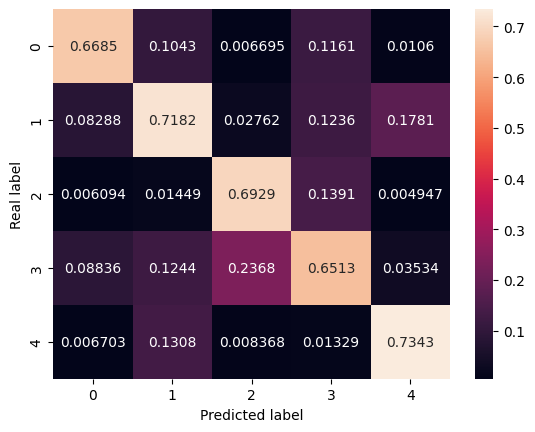

In [195]:
sns.heatmap(l,annot=True,fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.savefig(f'/content/drive/MyDrive/work 37 corona /result/{name}_confusion_matrix.png',bbox_inches='tight')
pd.DataFrame(l).to_csv(f'/content/drive/MyDrive/work 37 corona /result/{name}_confusion_matrix.csv')

In [136]:
from sklearn.metrics import classification_report

print(classification_report(yt,yp))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       179
         1.0       0.98      0.95      0.97       193
         2.0       0.93      0.93      0.93       338
         3.0       0.95      0.96      0.96       411
         4.0       0.92      0.95      0.93       223

    accuracy                           0.94      1344
   macro avg       0.94      0.94      0.94      1344
weighted avg       0.94      0.94      0.94      1344



In [102]:
# result = pd.DataFrame()

In [103]:
result['Albert'] = [accuracy_score(yt,yp),recall_score(yt,yp,average='macro'),precision_score(yt,yp,average='macro'),f1_score(yt,yp,average='macro')]
# ,precision_recall_curve(yt,yp,average='weighted'),roc_auc_score(yt,yp,average='weighted')

In [105]:
result.index = ['accuracy','recall','precision','f1-score']

In [107]:
result.to_csv('/content/drive/MyDrive/work 37 corona /result/result.csv')

In [226]:
result

,LSTM,2-LSTM,3-LSTM,2CNN-2LSTM,Dense,Albert
accuracy,0.719306,0.731317,0.735320,0.764791,0.691504,0.940476
recall,0.729095,0.735055,0.740089,0.765585,0.693032,0.937326
precision,0.726737,0.738584,0.741904,0.779997,0.708153,0.940916
f1-score,0.727706,0.736601,0.740852,0.771949,0.699267,0.938989


In [228]:
f=result

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

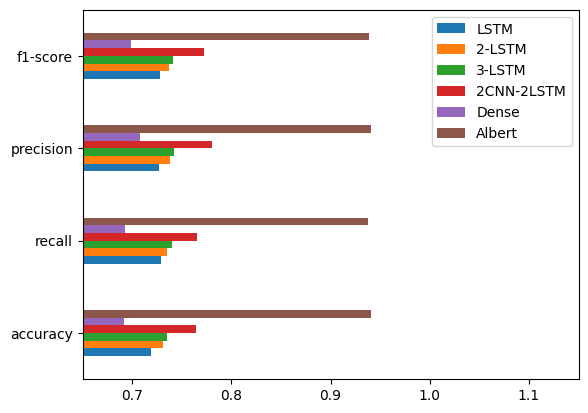

In [234]:
f.plot(kind='barh')
plt.xlim(0.65,1.15)
plt.savefig('/content/drive/MyDrive/work 37 corona /result/performance.png',bbox_inches='tight')
f.to_csv('/content/drive/MyDrive/work 37 corona /result/performance.csv')

In [238]:
l = f.columns

In [247]:
f2 = pd.concat([f[l[0]],f[l[1]],f[l[2]],f[l[3]],f[l[4]],f[l[5]]])

In [244]:
# f2['metrics'] = f2.index

In [248]:
f3 = pd.DataFrame()
f3['metrics'] = f2.index
f3['values'] = f2.values

In [251]:
mod = [i for i in f.columns for j in range(4)]

In [252]:
f3['models name'] = mod

In [253]:
f3

,metrics,values,models name
0,accuracy,0.719306,LSTM
1,recall,0.729095,LSTM
2,precision,0.726737,LSTM
3,f1-score,0.727706,LSTM
4,accuracy,0.731317,2-LSTM
5,recall,0.735055,2-LSTM
6,precision,0.738584,2-LSTM
7,f1-score,0.736601,2-LSTM
8,accuracy,0.735320,3-LSTM
9,recall,0.740089,3-LSTM


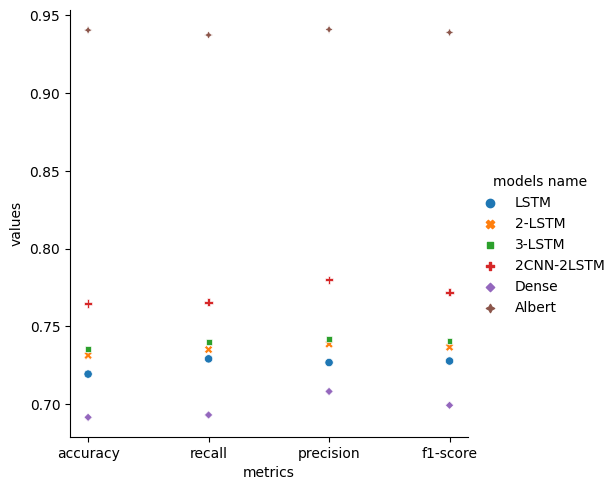

In [257]:
sns.relplot(data=f3, x="metrics", y="values", hue="models name",style='models name')
plt.savefig('/content/drive/MyDrive/work 37 corona /result/performance2.png',bbox_inches='tight')
f3.to_csv('/content/drive/MyDrive/work 37 corona /result/performance2.csv')

In [258]:
f3.columns

Index(['metrics', 'values', 'models name'], dtype='object')

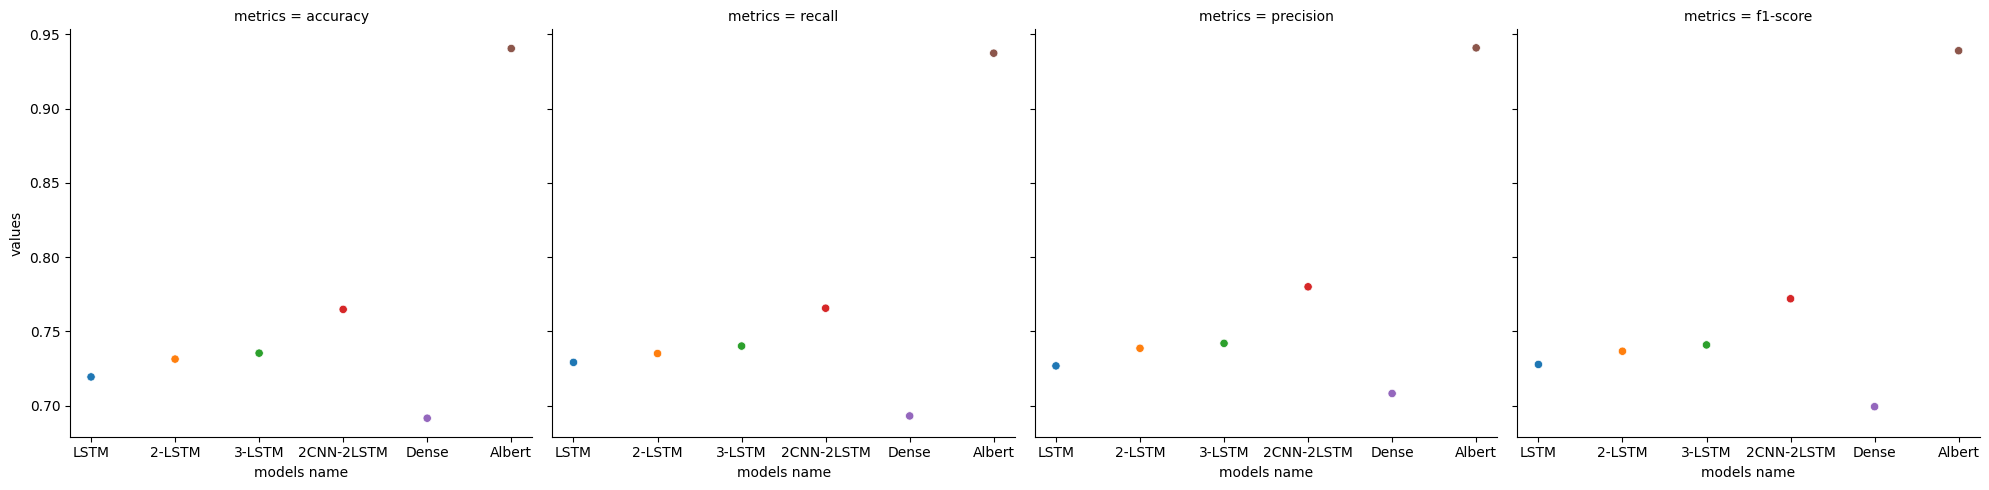

In [263]:
sns.relplot(
    data=f3,
    x="models name", y="values", hue="models name", col="metrics",legend=None
)
plt.savefig('/content/drive/MyDrive/work 37 corona /result/performance2.png',bbox_inches='tight')
f3.to_csv('/content/drive/MyDrive/work 37 corona /result/performance2.csv')